In [2]:
!pip install pandas
!pip install tensorflow==2.10.1
!pip install numpy
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 4.2 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 5.0 MB/s eta 0:00:005.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 3.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

2024-09-05 15:50:57.532217: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-05 15:50:57.535389: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-05 15:50:57.545220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 15:50:57.561369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-05 15:50:57.566256: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-05 15:50:57.578556: I tensorflow/core/platform/cpu_feature_gu

In [2]:
!pip install scipy

import os


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [36]:
from dotenv import load_dotenv
load_dotenv()

True

In [37]:
import os

TRAIN_DATA_DIR = os.environ.get('TRAIN_DATA_DIR')
VALID_DATA_DIR = os.environ.get('VALID_DATA_DIR')
TEST_DATA_DIR = os.environ.get('TEST_DATA_DIR')

# Load the training data
train_ds = image_dataset_from_directory(
    TRAIN_DATA_DIR,
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the validation data
val_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid',
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)

# Load the test data
test_ds = image_dataset_from_directory(
    '/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test',
    label_mode='categorical',
    #class_names=['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(64, 64)
)


Found 25136 files belonging to 5 classes.
Found 2812 files belonging to 5 classes.
Found 1649 files belonging to 5 classes.


In [12]:
class_names = train_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

TypeError: only integer scalar arrays can be converted to a scalar index

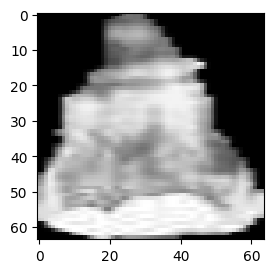

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for i, element in enumerate(train_ds.as_numpy_iterator()):
    if i<1:
        print(element[0])
        print(element[1])
    else:
        break

In [21]:
train_ds_norm = train_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(train_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [22]:
test_ds_norm = test_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(test_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [23]:
val_ds_norm = val_ds.map(lambda x, y: (x/255, y))
image_batch, labels_batch = next(iter(val_ds_norm))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.58574075


In [12]:
#train_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/train')
#test_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test')
#val_ds_norm.save('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid')

In [13]:
#import tensorflow as tf

#new = tf.data.Dataset.load('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/valid')
#new

<_LoadDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#for i, element in enumerate(new.as_numpy_iterator()):
#    if i<1:
#        print(element[0])
#        print(element[1])
#    else:
#        break

## evaluate model

In [15]:
from tensorflow.keras.models import load_model

model = load_model('/home/enric/code/tdurova/starsmiles/models/model.keras')

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])


In [17]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [18]:
metrics = model.evaluate(
        test_ds,
        return_dict=True
    )

loss = metrics["loss"]
accuracy = metrics["accuracy"]

print(loss, accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8952 - loss: 0.2889
0.2776462733745575 0.9066100716590881


## Process and prediction

In [19]:
!pip install Pillow


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [20]:
from tensorflow.keras.utils import img_to_array
from PIL import Image

image = Image.open('/home/enric/code/tdurova/starsmiles/raw_data/Dental_Radiography/test/Cavity/0905_jpg.rf.93c5b0e9d232f394f6cedf1c8f3879f4_segment_200.png')
img = img_to_array(image)
img.shape[2]

3

In [21]:
img.shape[:2]

(64, 64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..181.0].


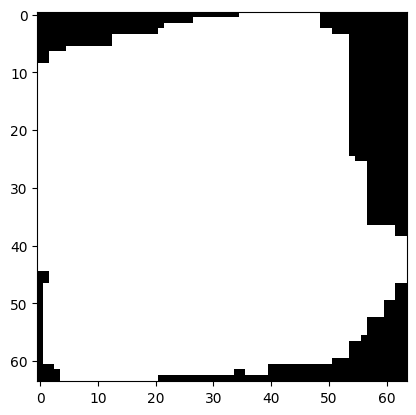

In [22]:
from tensorflow.keras.preprocessing.image import smart_resize

resized_im = smart_resize(img, (64,64))
plt.imshow(resized_im)

In [23]:
type(resized_im)

numpy.ndarray

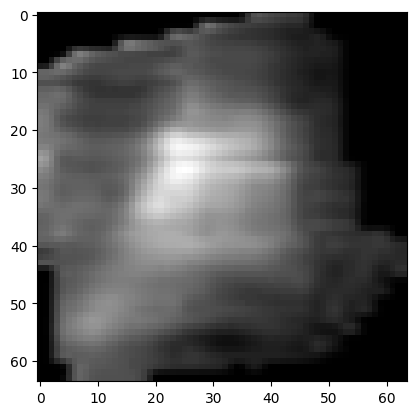

In [24]:
from tensorflow.image import rgb_to_grayscale

grey_res_im = rgb_to_grayscale(resized_im)
plt.imshow(grey_res_im, cmap='gray')

In [25]:
print(grey_res_im.shape, type(grey_res_im))

(64, 64, 1) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [26]:
p = np.expand_dims(grey_res_im, axis=0)

pred = model.predict(p)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[1.00033574e-01, 2.57647410e-02, 4.75188826e-05, 3.46258930e-05,
        8.74119520e-01]], dtype=float32)

In [27]:
p.shape

(1, 64, 64, 1)

In [28]:
class_names= train_ds.class_names
class_names

['Cavity', 'Fillings', 'Impacted Tooth', 'Implant', 'Normal']

In [29]:
threshold = 0.5
for i in range(len(class_names)):
    print(f'Probability of {class_names[i]}: {round(100*pred[0,i],2)}%')

    if pred[0,i]>threshold:
        threshold=pred[0,i]
        prediction = class_names[i]

print(f'Prediction is: {prediction}')


Probability of Cavity: 10.0%
Probability of Fillings: 2.58%
Probability of Impacted Tooth: 0.0%
Probability of Implant: 0.0%
Probability of Normal: 87.41%
Prediction is: Normal


In [30]:
prediction

'Normal'